In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matploylib inline

UsageError: Line magic function `%matploylib` not found.


In [8]:
athletes=pd.read_csv('C:/Users/Fatemeh/Desktop/Covid Project/Olympic Dataset/athlete_events.csv')
regions = pd.read_csv("C:/Users/Fatemeh/Desktop/Covid Project/Olympic Dataset/noc_regions.csv")


In [9]:
regions.head()

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


In [10]:
athletes_df= athletes.merge(regions, how= 'left', on= 'NOC')
athletes_df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN


In [11]:
athletes_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 271116 entries, 0 to 271115
Data columns (total 17 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
 15  region  270746 non-null  object 
 16  notes   5039 non-null    object 
dtypes: float64(3), int64(2), object(12)
memory usage: 37.2+ MB


In [12]:
athletes_df.shape

(271116, 17)

In [13]:
athletes_df.rename(columns ={'region':'Region', 'notes':'Notes'}, inplace = True)

In [14]:
athletes_df.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


In [111]:
nan_values = athletes_df.isna().any()


In [16]:
athletes_df['Age'].isna().sum()

9474

In [17]:
nan_vals = athletes_df.isna().sum()
nan_vals.iloc[3]


9474

In [18]:
athletes_df.isna().sum().sum()

630300

In [19]:
nan_cols = [i for i in athletes_df.columns if athletes_df[i].isnull().any()]
nan_cols

['Age', 'Height', 'Weight', 'Medal', 'Region', 'Notes']

In [20]:
athletes_df.query('Year== 2016').head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Region,Notes
80,22,Andreea Aanei,F,22.0,170.0,125.0,Romania,ROU,2016 Summer,2016,Summer,Rio de Janeiro,Weightlifting,Weightlifting Women's Super-Heavyweight,NaN,Romania,NaN
139,51,Nstor Abad Sanjun,M,23.0,167.0,64.0,Spain,ESP,2016 Summer,2016,Summer,Rio de Janeiro,Gymnastics,Gymnastics Men's Individual All-Around,NaN,Spain,NaN
140,51,Nstor Abad Sanjun,M,23.0,167.0,64.0,Spain,ESP,2016 Summer,2016,Summer,Rio de Janeiro,Gymnastics,Gymnastics Men's Floor Exercise,NaN,Spain,NaN
141,51,Nstor Abad Sanjun,M,23.0,167.0,64.0,Spain,ESP,2016 Summer,2016,Summer,Rio de Janeiro,Gymnastics,Gymnastics Men's Parallel Bars,NaN,Spain,NaN
142,51,Nstor Abad Sanjun,M,23.0,167.0,64.0,Spain,ESP,2016 Summer,2016,Summer,Rio de Janeiro,Gymnastics,Gymnastics Men's Horizontal Bar,NaN,Spain,NaN


In [25]:
Top_10_countries = athletes_df.Team.value_counts().sort_values(ascending=False)[:10]
Top_10_countries

United States    17847
France           11988
Great Britain    11404
Italy            10260
Germany           9326
Canada            9279
Japan             8289
Sweden            8052
Australia         7513
Hungary           6547
Name: Team, dtype: int64

Text(0.5, 1.0, 'Overall participation by country')

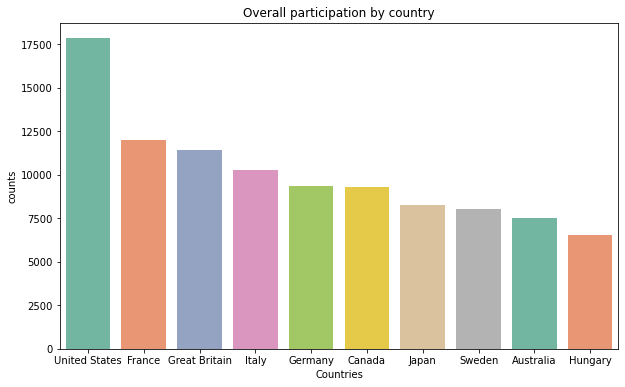

In [55]:
fig = plt.figure(figsize=(10,6))
sns.barplot(x =Top_10_countries.index, y=Top_10_countries, palette ='Set2')
plt.xlabel('Countries')
#plt.xticks(rotation=90)
plt.ylabel('counts')
plt.title("Overall participation by country")


(array([1.4000e+01, 2.2600e+02, 3.0400e+03, 9.2280e+03, 1.9795e+04,
        3.4422e+04, 4.2689e+04, 4.1427e+04, 3.3700e+04, 2.5506e+04,
        1.7047e+04, 1.1046e+04, 7.1180e+03, 4.4560e+03, 3.0170e+03,
        2.1630e+03, 1.6590e+03, 1.2670e+03, 8.3700e+02, 7.6900e+02,
        4.7700e+02, 4.4400e+02, 2.6600e+02, 2.0000e+02, 1.7100e+02,
        1.5600e+02, 1.1800e+02, 1.1400e+02, 8.1000e+01]),
 array([10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42,
        44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66, 68]),
 <BarContainer object of 29 artists>)

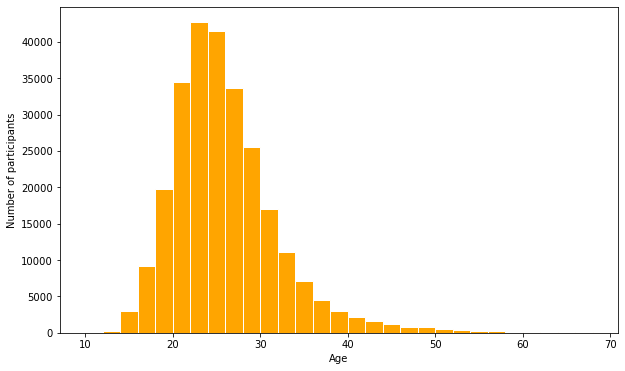

In [75]:
# Age distribution of athletes

fig =plt.figure(figsize=(10,6))
plt.xlabel("Age")
plt.ylabel("Number of participants")
plt.hist(athletes_df.Age, bins = np.arange(10,70,2), color ='orange', edgecolor ='white')

In [87]:
winter_sports = athletes_df[athletes_df.Season =='Winter'].Sport.unique()
winter_sports

array(['Speed Skating', 'Cross Country Skiing', 'Ice Hockey', 'Biathlon',
       'Alpine Skiing', 'Luge', 'Bobsleigh', 'Figure Skating',
       'Nordic Combined', 'Freestyle Skiing', 'Ski Jumping', 'Curling',
       'Snowboarding', 'Short Track Speed Skating', 'Skeleton',
       'Military Ski Patrol', 'Alpinism'], dtype=object)

In [97]:
gender_counts = athletes_df.Sex.value_counts()
gender_counts

M    196594
F     74522
Name: Sex, dtype: int64

([<matplotlib.patches.Wedge at 0x22b7085d9a0>,
 [Text(0.20089640434146097, -1.081499253223354, 'M'),
  Text(-0.2008963030841931, 1.081499272032628, 'F')],
 [Text(0.10957985691352415, -0.5899086835763748, '72.5%'),
  Text(-0.10957980168228713, 0.5899086938359788, '27.5%')])

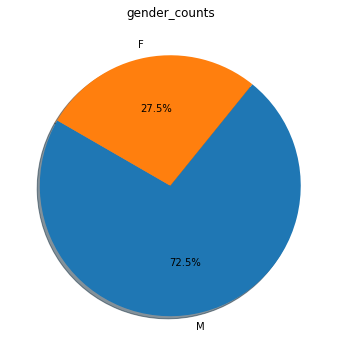

In [104]:
fig = plt.figure(figsize=(12,6))
plt.title('gender_counts')
plt.pie(gender_counts, labels= gender_counts.index, autopct ='%1.1f%%', startangle = 150, shadow =True)

In [107]:
Total_medals = athletes_df.Medal.value_counts()
Total_medals

Gold      13372
Bronze    13295
Silver    13116
Name: Medal, dtype: int64

In [122]:
Total_female_eachOlympic = athletes_df[(athletes_df.Sex=='F') & (athletes_df.Season =="Summer")].groupby(['Year'])[['Sex']].count().reset_index()
Total_female_eachOlympic.tail()

,Year,Sex
23,2000,5431
24,2004,5546
25,2008,5816
26,2012,5815
27,2016,6223


In [171]:
Total_female_summer = athletes_df[(athletes_df.Sex=='F') & (athletes_df.Season =="Summer")]
Total_female_summer


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Region,Notes
26,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN,Netherlands,NaN
27,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 4 x 100 metres Relay,NaN,Netherlands,NaN
32,13,Minna Maarit Aalto,F,30.0,159.0,55.5,Finland,FIN,1996 Summer,1996,Summer,Atlanta,Sailing,Sailing Women's Windsurfer,NaN,Finland,NaN
33,13,Minna Maarit Aalto,F,34.0,159.0,55.5,Finland,FIN,2000 Summer,2000,Summer,Sydney,Sailing,Sailing Women's Windsurfer,NaN,Finland,NaN
79,21,Ragnhild Margrethe Aamodt,F,27.0,163.0,NaN,Norway,NOR,2008 Summer,2008,Summer,Beijing,Handball,Handball Women's Handball,Gold,Norway,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271080,135553,Galina Ivanovna Zybina (-Fyodorova),F,33.0,168.0,80.0,Soviet Union,URS,1964 Summer,1964,Summer,Tokyo,Athletics,Athletics Women's Shot Put,Bronze,Russia,NaN
271099,135560,Stavroula Zygouri,F,36.0,171.0,63.0,Greece,GRE,2004 Summer,2004,Summer,Athina,Wrestling,"Wrestling Women's Middleweight, Freestyle",NaN,Greece,NaN
271102,135563,Olesya Nikolayevna Zykina,F,19.0,171.0,64.0,Russia,RUS,2000 Summer,2000,Summer,Sydney,Athletics,Athletics Women's 4 x 400 metres Relay,Bronze,Russia,NaN
271103,135563,Olesya Nikolayevna Zykina,F,23.0,171.0,64.0,Russia,RUS,2004 Summer,2004,Summer,Athina,Athletics,Athletics Women's 4 x 400 metres Relay,Silver,Russia,NaN


<AxesSubplot:title={'center':'female participants'}, xlabel='Year', ylabel='count'>

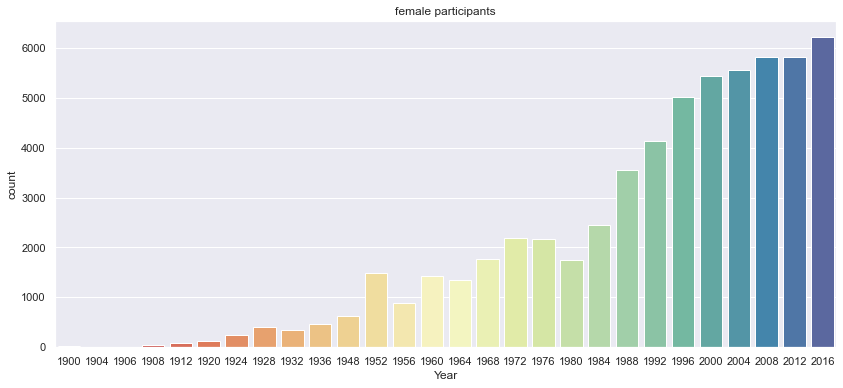

In [133]:
sns.set(style='darkgrid')
fig = plt.figure(figsize=(14,6))
plt.title('female participants')
sns.countplot(x ='Year', data=Total_female_summer , palette = 'Spectral' )


<AxesSubplot:title={'center':'Plot of female thletes over time'}, xlabel='Year'>

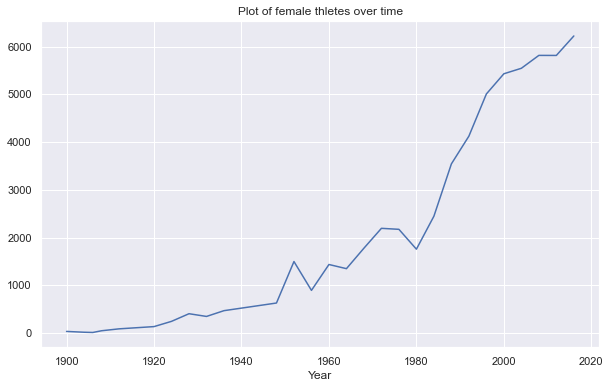

In [143]:
part = athletes_df[(athletes_df.Sex=='F') & (athletes_df.Season =="Summer")].groupby('Year')['Sex'].value_counts()
fig = plt.figure(figsize=(10,6))
plt.title('Plot of female thletes over time')
part.loc[:,'F'].plot()



In [163]:
# Beyond 60 years old Gold medal winners 

Goldmedals = athletes_df[athletes_df.Medal == 'Gold']
goldMedals = Goldmedals[np.isfinite(Goldmedals['Age'])]
goldMedals['ID'][goldMedals['Age']> 60]

104003     52626
105199     53238
190952     95906
226374    113773
233390    117046
261102    130662
Name: ID, dtype: int64

In [166]:
sports = goldMedals['Sport'][goldMedals['Age']>60]
sports

104003    Art Competitions
105199               Roque
190952             Archery
226374             Archery
233390            Shooting
261102             Archery
Name: Sport, dtype: object

C:\Users\Fatemeh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sport', ylabel='count'>

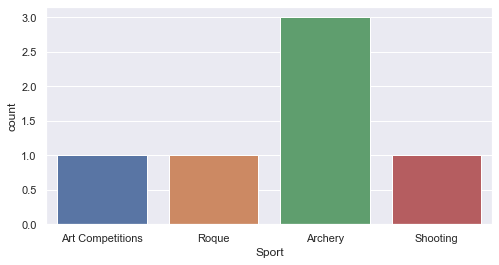

In [170]:
fig = plt.figure(figsize=(8,4))
sns.countplot(sports)

In [187]:
gold_num = Goldmedals.Region.value_counts().reset_index(name='Medal')
gold_num

,index,Medal
0,USA,2638
1,Russia,1599
2,Germany,1301
3,UK,678
4,Italy,575
...,...,...
94,Ivory Coast,1
95,Ecuador,1
96,Costa Rica,1
97,Peru,1


fig = plt.figure(figsize=(8,4))
sns.barplot(gold_num, x = gold_num.index, y = gold_num.Medal)

In [188]:
max_year = athletes_df.Year.max()

team_names = athletes_df[(athletes_df.Year == max_year) & (athletes_df.Medal =='Gold')].Team

team_names.value_counts().head()

United States    137
Great Britain     64
Russia            50
Germany           47
China             44
Name: Team, dtype: int64

Text(0.5, 0, 'Countrywise Medals for the year 2016')

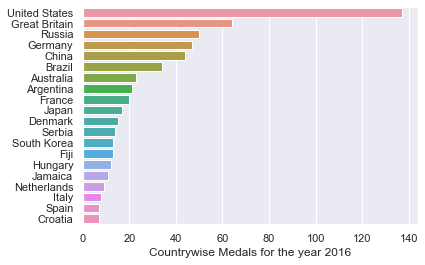

In [189]:
# Countrywise Medals for the year 2016

sns.barplot(x=team_names.value_counts().head(20), y = team_names.value_counts().head(20).index)

plt.ylabel(None)
plt.xlabel('Countrywise Medals for the year 2016')

Text(0.5, 1.0, 'Height and Weight of olympic Medalists')

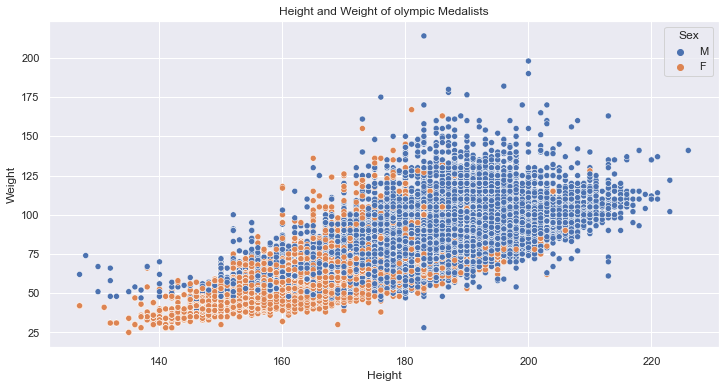

In [193]:
# Height and Weight of olympic Medalists
Not_null_medals= athletes_df[(athletes_df.Height.notnull()) & (athletes_df.Weight.notnull())]

fig = plt.figure(figsize = (12, 6))
sns.scatterplot(x ="Height", y='Weight', data = Not_null_medals, hue ='Sex')
plt.title('Height and Weight of olympic Medalists')